#### 分类问题与回归问题
 
分类问题预测类别，模型输出是概率的分布。
* 三分类输出样例：[0.2,0.7,0.1]
    
回归问题预测的是值，模型输出一个实数值。

#### 目标函数
分类问题：
衡量目标类别与当前预测的差距：
* 三分类输出样例：[0.2,0.7,0.1]
* 三分类真实类别：2-->onehot-->[0,0,1]

onehot编码，把正整数变为向量表达（离散值变成分布），该向量只有该正整数位置为1，其余位置为0.

In [1]:
#检查版本

import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import numpy as np
import pandas as pd
import os,sys,time

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

matplotlib 3.1.1
numpy 1.16.0
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
#获得数据集

fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

#把训练集差分成训练集和验证集
x_valid,x_train = x_train[:5000],x_train[5000:]
y_valid,y_train = y_train[:5000],y_train[5000:]

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [3]:
# 加入批归一化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x :[None,28,28]-->[None,784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)




In [ ]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()

show_single_image(x_train[1])

In [ ]:
def show_much_images(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    assert n_rows*n_cols<len(x_data)
    
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols*row+col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['tshirt','trouser','pullover','dress','coat','sandal','shirt','sneaker'
              ,'bag','ankleboot']

show_much_images(2,9,x_train,y_train,class_names)


In [4]:
# tf.keras.models.sequential
#构建模型

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28],name='input'))
model.add(keras.layers.Dense(300,activation='relu',name='fc1')) #relu: y = max(0,x)
model.add(keras.layers.Dense(100,activation='relu',name='fc2'))
model.add(keras.layers.Dense(10,activation='softmax',name='softmax')) #softmax 将向量变成概率分布

from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.1)

# 如果标签只是一个数，用sce 如果是向量则直接用cross entropy
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = sgd,metrics=["accuracy"]
             )

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 300)               235500    
_________________________________________________________________
fc2 (Dense)                  (None, 100)               30100     
_________________________________________________________________
softmax (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train_scaled,y_train,epochs=10,
         validation_data=(x_valid_scaled,y_valid),
                   )

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 57us/sample - loss: 0.4639 - accuracy: 0.8288 - val_loss: 0.3972 - val_accuracy: 0.8512
Epoch 2/10
55000/55000 [==============================] - 3s 60us/sample - loss: 0.3469 - accuracy: 0.8702 - val_loss: 0.4680 - val_accuracy: 0.8234
Epoch 3/10
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3076 - accuracy: 0.8840 - val_loss: 0.3417 - val_accuracy: 0.8692
Epoch 4/10
55000/55000 [==============================] - 4s 77us/sample - loss: 0.2781 - accuracy: 0.8962 - val_loss: 0.3165 - val_accuracy: 0.8858
Epoch 5/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.2606 - accuracy: 0.9023 - val_loss: 0.3188 - val_accuracy: 0.8832
Epoch 6/10
55000/55000 [==============================] - 7s 131us/sample - loss: 0.2428 - accuracy: 0.9085 - val_loss: 0.4225 - val_accuracy: 0.8634
Epoch 7/10
55000/55000 [==============================] 

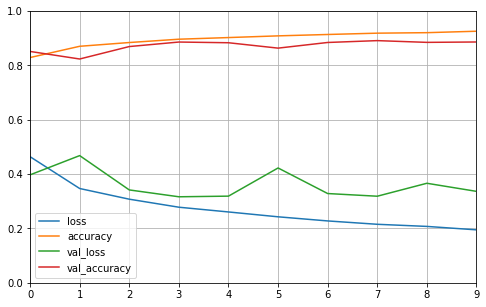

In [10]:
def show_history(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
show_history(history)

In [11]:
model.evaluate(x_test_scaled,y_test)

10000/10000 [==============================] - 2s 194us/sample - loss: 0.3689 - accuracy: 0.8781


[0.3688828088372946, 0.8781]